<a href="https://colab.research.google.com/github/fabianorc2506-sys/Fundamentos-em-Ci-ncias-de-Dados/blob/main/Trabalho_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalho 4**

# **Questão 1.** Considere a tabela a seguir, que apresenta o perfil dos alunos ingressantes em um curso de graduação de uma universidade pública em 2024. A tabela contém informações sobre o sexo, tipo de escola de origem (pública ou privada), nota de ingresso (em pontos), idade e se o aluno trabalha ou não.
\vspace{5mm}

\begin{table}[h!]
\centering
\begin{tabular}{c|ccccc}
\multirow{2}{*}{Registro} & \multirow{2}{*}{Sexo} & Tipo de & Nota de & \multirow{2}{*}{Idade (anos)} & \multirow{2}{*}{Trabalha} \\
 & & Escola & Ingresso & &  \\ \hline
101 & Feminino & Pública & 712 & 18 & Não \\
102 & Masculino & Privada & 765 & 19 & Não \\
103 & Feminino & Pública & 680 & 20 & Sim \\
104 & Masculino & Pública & 698 & 22 & Sim \\
105 & Feminino & Privada & 802 & 18 & Não \\
106 & Feminino & Privada & 788 & 19 & Não \\
107 & Masculino & Pública & 675 & 21 & Sim \\
108 & Masculino & Pública & 710 & 20 & Não \\
109 & Feminino & Pública & 690 & 19 & Não \\
110 & Feminino & Privada & 815 & 18 & Não \\
111 & Masculino & Pública & 662 & 23 & Sim \\
112 & Feminino & Pública & 705 & 21 & Sim \\
113 & Masculino & Privada & 780 & 18 & Não \\
114 & Feminino & Pública & 695 & 20 & Sim \\
115 & Masculino & Pública & 670 & 22 & Sim \\
\hline
\end{tabular}
\caption{Perfil dos alunos ingressantes em um curso de graduação (Fonte: Dados fictícios elaborados pelo autor).}
\label{tab:alunos}
\end{table}

\begin{enumerate}
    \item [(a)] Escolha duas variáveis qualitativas. O que se pode dizer a respeito da associação dessas duas variáveis? Justifique sua resposta, usando as ferramentas adequadas. \vspace{5mm}
    \item [(b)] Escolha duas variáveis quantitativas. Verifique se existe alguma relação entre essas variáveis e interprete em termos da situação apresentada, usando as ferramentas adequadas. \vspace{5mm}
    \item [(c)] Escolha uma variável qualitativa e uma variável quantitativa e compare-as adequadamente. Quais conclusões podemos estabelecer?\vspace{5mm}
\end{enumerate}\

**a) Variáveis "Tipos de Escola" e "Trabalha"**

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import chi2_contingency

# Dados baseados na tabela LaTeX fornecida
data = {
    "Registro": [101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115],
    "Sexo": ["Feminino", "Masculino", "Feminino", "Masculino", "Feminino", "Feminino", "Masculino", "Masculino", "Feminino", "Feminino", "Masculino", "Feminino", "Masculino", "Feminino", "Masculino"],
    "Tipo de Escola": ["Pública", "Privada", "Pública", "Pública", "Privada", "Privada", "Pública", "Pública", "Pública", "Privada", "Pública", "Pública", "Privada", "Pública", "Pública"],
    "Nota de Ingresso": [712, 765, 680, 698, 802, 788, 675, 710, 690, 815, 662, 705, 780, 695, 670],
    "Idade": [18, 19, 20, 22, 18, 19, 21, 20, 19, 18, 23, 21, 18, 20, 22],
    "Trabalha": ["Não", "Não", "Sim", "Sim", "Não", "Não", "Sim", "Não", "Não", "Não", "Sim", "Sim", "Não", "Sim", "Sim"]
}

df = pd.DataFrame(data)

# Criar a tabela de contingência correta
contingency = pd.crosstab(df["Tipo de Escola"], df["Trabalha"])
print("\nTabela de Contingência:")
print(contingency)

# Totais por linha e coluna
row_totals = contingency.sum(axis=1)
col_totals = contingency.sum(axis=0)
grand_total = contingency.to_numpy().sum()

# Frequência em relação ao total geral
freq_total = contingency / contingency.to_numpy().sum()
print("\nFrequência relativa (Total Geral):")
print(freq_total.round(3))

# Frequência relativa linha
freq_row = contingency.div(contingency.sum(axis=1), axis=0)
print("\nFrequência relativa (Por Linha):")
print(freq_row.round(3))

# Frequência relativa coluna
freq_col = contingency.div(contingency.sum(axis=0), axis=1)
print("\nFrequência relativa (Por Coluna):")
print(freq_col.round(3))

# Matriz numpy diretamente dos valores confirmados: [[5, 0], [3, 7]]
matriz = np.array([[5, 0],
                   [3, 7]])

# Teste qui-quadrado
chi2, _, _, _ = chi2_contingency(matriz, correction=False)

# Soma total
n = matriz.sum()

# Coeficiente de contingência de Pearson
C = np.sqrt(chi2 / (chi2 + n))

# Interpretação
if C == 0:
    interpretacao = "Não há associação entre as variáveis."
elif C <= 0.1:
    interpretacao = "Associação muito fraca."
elif C <= 0.2:
    interpretacao = "Associação fraca"
elif C <= 0.3:
    interpretacao = "Associação moderada."
elif C <= 0.4:
    interpretacao = "Associação forte."
elif C <= 0.5:
    interpretacao = "Associação muito forte."
else:
    interpretacao = "Associação extremamente forte."

# Resultados finais
print("\nCoeficiente de Contingência de Pearson:", round(C, 4))
print("Interpretação:", interpretacao)



Tabela de Contingência:
Trabalha        Não  Sim
Tipo de Escola          
Privada           5    0
Pública           3    7

Frequência relativa (Total Geral):
Trabalha          Não    Sim
Tipo de Escola              
Privada         0.333  0.000
Pública         0.200  0.467

Frequência relativa (Por Linha):
Trabalha        Não  Sim
Tipo de Escola          
Privada         1.0  0.0
Pública         0.3  0.7

Frequência relativa (Por Coluna):
Trabalha          Não  Sim
Tipo de Escola            
Privada         0.625  0.0
Pública         0.375  1.0

Coeficiente de Contingência de Pearson: 0.5517
Interpretação: Associação extremamente forte.


**a) Variáveis "Sexo" e "Trabalha"**

In [ ]:
# Criar a tabela de contingência correta
contingency = pd.crosstab(df["Sexo"], df["Trabalha"])
print("\nTabela de Contingência:")
print(contingency)

# Frequência em relação ao total geral
freq_total = contingency / contingency.to_numpy().sum()
print("\nFrequência relativa (Total Geral):")
print(freq_total.round(3))

# Frequência relativa linha
freq_row = contingency.div(contingency.sum(axis=1), axis=0)
print("\nFrequência relativa (Por Linha):")
print(freq_row.round(3))

# Frequência relativa coluna
freq_col = contingency.div(contingency.sum(axis=0), axis=1)
print("\nFrequência relativa (Por Coluna):")
print(freq_col.round(3))

# Matriz numpy diretamente dos valores confirmados: [[5, 0], [3, 7]]
matriz = np.array(contingency)

# Teste qui-quadrado
chi2, _, _, _ = chi2_contingency(matriz, correction=False)

# Soma total
n = matriz.sum()

# Coeficiente de contingência de Pearson
C = np.sqrt(chi2 / (chi2 + n))

# Interpretação
if C == 0:
    interpretacao = "Não há associação entre as variáveis."
elif C <= 0.1:
    interpretacao = "Associação muito fraca."
elif C <= 0.2:
    interpretacao = "Associação fraca"
elif C <= 0.3:
    interpretacao = "Associação moderada."
elif C <= 0.4:
    interpretacao = "Associação forte."
elif C <= 0.5:
    interpretacao = "Associação muito forte."
else:
    interpretacao = "Associação extremamente forte."

# Resultados finais
print("\nCoeficiente de Contingência de Pearson:", round(C, 4))
print("Interpretação:", interpretacao)


Tabela de Contingência:
Trabalha   Não  Sim
Sexo               
Feminino     5    3
Masculino    3    4

Frequência relativa (Total Geral):
Trabalha     Não    Sim
Sexo                   
Feminino   0.333  0.200
Masculino  0.200  0.267

Frequência relativa (Por Linha):
Trabalha     Não    Sim
Sexo                   
Feminino   0.625  0.375
Masculino  0.429  0.571

Frequência relativa (Por Coluna):
Trabalha     Não    Sim
Sexo                   
Feminino   0.625  0.429
Masculino  0.375  0.571

Coeficiente de Contingência de Pearson: 0.1927
Interpretação: Associação fraca


# **a)Variáveis Sexo e Tipo de Escola**

In [ ]:
# Criar a tabela de contingência correta
contingency = pd.crosstab(df["Sexo"], df["Tipo de Escola"])
print("\nTabela de Contingência:")
print(contingency)

# Frequência em relação ao total geral
freq_total = contingency / contingency.to_numpy().sum()
print("\nFrequência relativa (Total Geral):")
print(freq_total.round(3))

# Frequência relativa linha
freq_row = contingency.div(contingency.sum(axis=1), axis=0)
print("\nFrequência relativa (Por Linha):")
print(freq_row.round(3))

# Frequência relativa coluna
freq_col = contingency.div(contingency.sum(axis=0), axis=1)
print("\nFrequência relativa (Por Coluna):")
print(freq_col.round(3))

# Matriz numpy diretamente dos valores confirmados: [[5, 0], [3, 7]]
matriz = np.array(contingency)

# Teste qui-quadrado
chi2, _, _, _ = chi2_contingency(matriz, correction=False)

# Soma total
n = matriz.sum()

# Coeficiente de contingência de Pearson
C = np.sqrt(chi2 / (chi2 + n))

# Interpretação
if C == 0:
    interpretacao = "Não há associação entre as variáveis."
elif C <= 0.1:
    interpretacao = "Associação muito fraca."
elif C <= 0.2:
    interpretacao = "Associação fraca"
elif C <= 0.3:
    interpretacao = "Associação moderada."
elif C <= 0.4:
    interpretacao = "Associação forte."
elif C <= 0.5:
    interpretacao = "Associação muito forte."
else:
    interpretacao = "Associação extremamente forte."

# Resultados finais
print("\nCoeficiente de Contingência de Pearson:", round(C, 4))
print("Interpretação:", interpretacao)


Tabela de Contingência:
Tipo de Escola  Privada  Pública
Sexo                            
Feminino              3        5
Masculino             2        5

Frequência relativa (Total Geral):
Tipo de Escola  Privada  Pública
Sexo                            
Feminino          0.200    0.333
Masculino         0.133    0.333

Frequência relativa (Por Linha):
Tipo de Escola  Privada  Pública
Sexo                            
Feminino          0.375    0.625
Masculino         0.286    0.714

Frequência relativa (Por Coluna):
Tipo de Escola  Privada  Pública
Sexo                            
Feminino            0.6      0.5
Masculino           0.4      0.5

Coeficiente de Contingência de Pearson: 0.0941
Interpretação: Associação muito fraca.


# **b) Nota de Ingresso e Idade**

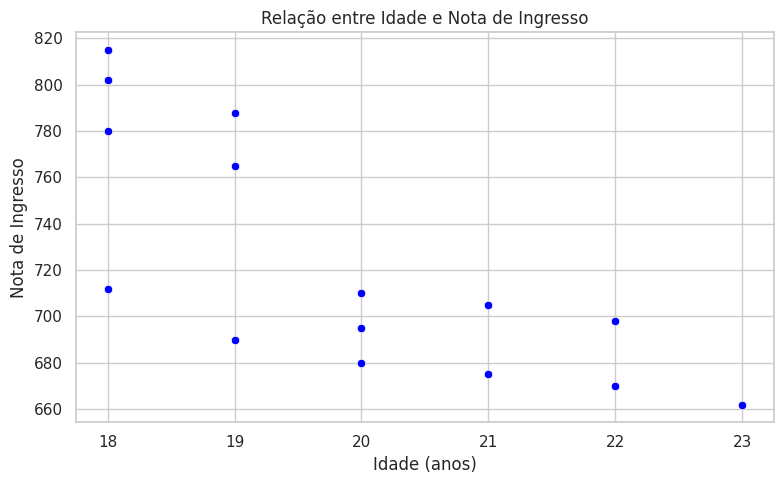

Coeficiente de Correlação de Pearson: -0.7649
Interpretação: Existe uma correlação linear forte negativa entre idade e nota de ingresso.


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

# Estilo semelhante ao ggplot2
sns.set_theme(style="whitegrid")

# 1. Gráfico de dispersão com seaborn/matplotlib
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Idade", y="Nota de Ingresso", color="blue")
plt.title("Relação entre Idade e Nota de Ingresso")
plt.xlabel("Idade (anos)")
plt.ylabel("Nota de Ingresso")
plt.tight_layout()
plt.show()

# 2. Coeficiente de Correlação de Pearson
corr, p_valor = pearsonr(df["Idade"], df["Nota de Ingresso"])
print(f"Coeficiente de Correlação de Pearson: {corr:.4f}")

# Interpretação
if abs(corr) < 0.1:
    interpretacao = "não há correlação linear"
elif abs(corr) < 0.3:
    interpretacao = "correlação linear fraca"
elif abs(corr) < 0.5:
    interpretacao = "correlação linear moderada"
else:
    interpretacao = "correlação linear forte"

if corr > 0:
    direcao = "positiva"
elif corr < 0:
    direcao = "negativa"
else:
    direcao = "nula"

print(f"Interpretação: Existe uma {interpretacao} {direcao} entre idade e nota de ingresso.")

# **Item C**

# **C) Variáveis Sexo e Notas de Ingresso**

                             Feminino Masculino
n                                   8         7
Média                          735.88    708.57
Mediana                         708.5     698.0
Moda                              680       662
Mínimo                            680       662
Máximo                            815       780
Amplitude                         135       118
1º Quartil (Q1)                693.75     672.5
3º Quartil (Q3)                 791.5     737.5
Intervalo Interquartil (IIQ)    97.75      65.0
Desvio Padrão                   55.77     46.88
Coef. de Variação (CV)           7.6%      6.6%


/tmp/ipython-input-2278346093.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sexo', y='Nota de Ingresso', palette='pastel')


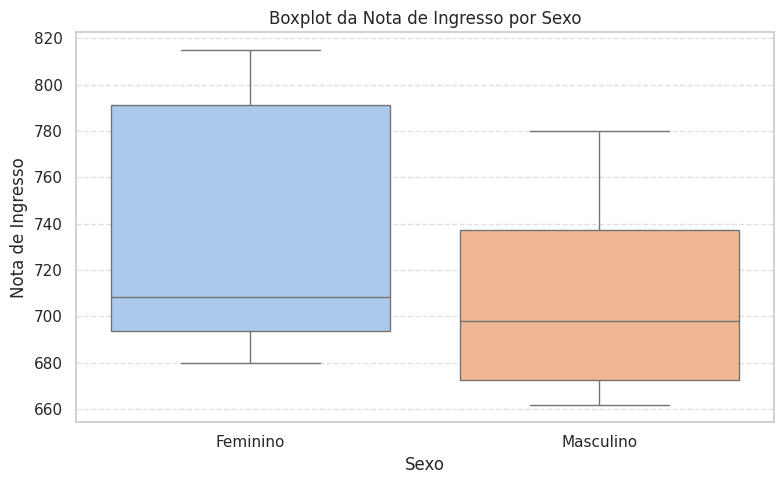

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Função para calcular estatísticas
def estatisticas(df, grupo):
    notas = df['Nota de Ingresso']
    estat = {
        'n': len(notas),
        'Média': round(notas.mean(), 2),
        'Mediana': round(notas.median(), 2),
        'Moda': notas.mode().iat[0] if not notas.mode().empty else '---',
        'Mínimo': notas.min(),
        'Máximo': notas.max(),
        'Amplitude': notas.max() - notas.min(),
        '1º Quartil (Q1)': round(notas.quantile(0.25), 2),
        '3º Quartil (Q3)': round(notas.quantile(0.75), 2),
        'Intervalo Interquartil (IIQ)': round(notas.quantile(0.75) - notas.quantile(0.25), 2),
        'Desvio Padrão': round(notas.std(ddof=1), 2),
        'Coef. de Variação (CV)': f"{round(100 * notas.std(ddof=1) / notas.mean(), 1)}%"
    }
    return pd.Series(estat, name=grupo)

# Estatísticas por sexo
grupo_fem = estatisticas(df[df['Sexo'] == 'Feminino'], 'Feminino')
grupo_masc = estatisticas(df[df['Sexo'] == 'Masculino'], 'Masculino')

# Tabela final
tabela_estatisticas = pd.concat([grupo_fem, grupo_masc], axis=1)
print(tabela_estatisticas)

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sexo', y='Nota de Ingresso', palette='pastel')
plt.title('Boxplot da Nota de Ingresso por Sexo')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **C) Variáveis Sexo e Idade**

                             Feminino Masculino
n                                   8         7
Média                           19.12     20.71
Mediana                          19.0      21.0
Moda                               18        22
Mínimo                             18        18
Máximo                             21        23
Amplitude                           3         5
1º Quartil (Q1)                  18.0      19.5
3º Quartil (Q3)                  20.0      22.0
Intervalo Interquartil (IIQ)      2.0       2.5
Desvio Padrão                    1.13       1.8
Coef. de Variação (CV)           5.9%      8.7%


/tmp/ipython-input-343136048.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Sexo', y='Idade', palette='pastel')


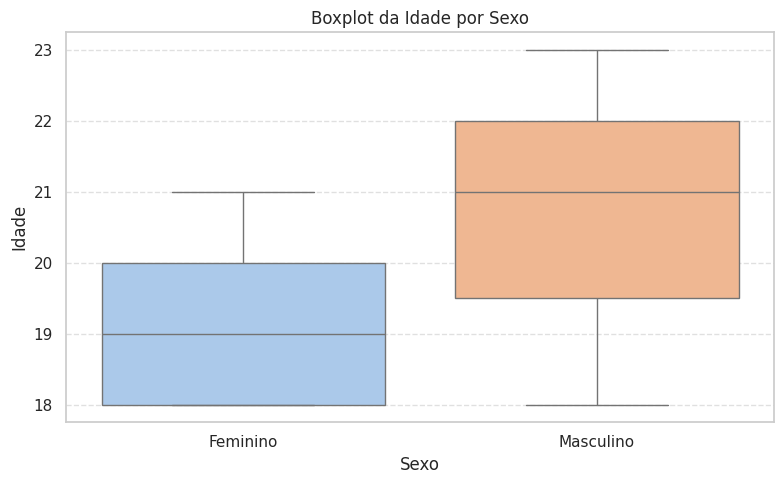

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Função para calcular estatísticas
def estatisticas(df, grupo):
    idade = df['Idade']
    estat = {
        'n': len(idade),
        'Média': round(idade.mean(), 2),
        'Mediana': round(idade.median(), 2),
        'Moda': idade.mode().iat[0] if not idade.mode().empty else '---',
        'Mínimo': idade.min(),
        'Máximo': idade.max(),
        'Amplitude': idade.max() - idade.min(),
        '1º Quartil (Q1)': round(idade.quantile(0.25), 2),
        '3º Quartil (Q3)': round(idade.quantile(0.75), 2),
        'Intervalo Interquartil (IIQ)': round(idade.quantile(0.75) - idade.quantile(0.25), 2),
        'Desvio Padrão': round(idade.std(ddof=1), 2),
        'Coef. de Variação (CV)': f"{round(100 * idade.std(ddof=1) / idade.mean(), 1)}%"
    }
    return pd.Series(estat, name=grupo)

# Estatísticas por sexo
grupo_fem = estatisticas(df[df['Sexo'] == 'Feminino'], 'Feminino')
grupo_masc = estatisticas(df[df['Sexo'] == 'Masculino'], 'Masculino')

# Tabela final
tabela_estatisticas = pd.concat([grupo_fem, grupo_masc], axis=1)
print(tabela_estatisticas)

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sexo', y='Idade', palette='pastel')
plt.title('Boxplot da Idade por Sexo')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **c) Variáveis Tipo de Escola e Nota de Ingresso**

                             Pública Privada
n                                 10       5
Média                          689.7   790.0
Mediana                        692.5   788.0
Moda                             662     765
Mínimo                           662     765
Máximo                           712     815
Amplitude                         50      50
1º Quartil (Q1)               676.25   780.0
3º Quartil (Q3)               703.25   802.0
Intervalo Interquartil (IIQ)    27.0    22.0
Desvio Padrão                  17.34   19.35
Coef. de Variação (CV)          2.5%    2.4%


/tmp/ipython-input-4146241249.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Tipo De Escola', y='Nota De Ingresso', palette='pastel')


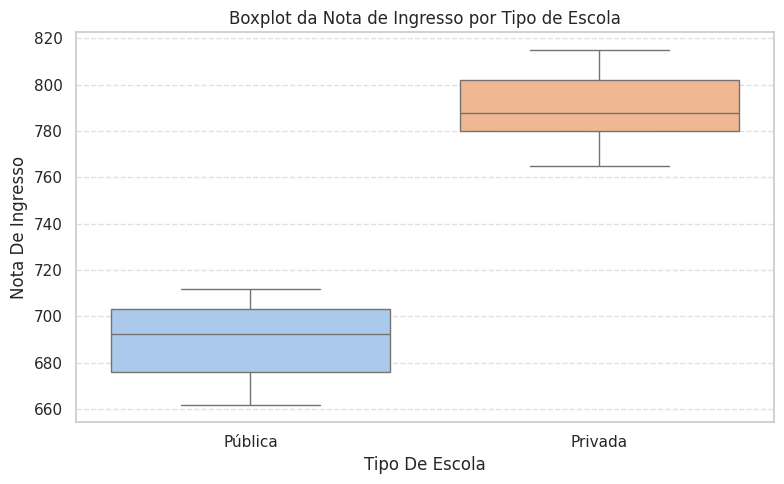

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Padroniza os nomes das colunas (remove espaços e capitaliza)
df.columns = df.columns.str.strip().str.title()

# Função para calcular estatísticas descritivas da Nota de Ingresso
def estatisticas(df, grupo):
    nota = df['Nota De Ingresso']
    estat = {
        'n': len(nota),
        'Média': round(nota.mean(), 2),
        'Mediana': round(nota.median(), 2),
        'Moda': nota.mode().iat[0] if not nota.mode().empty else '---',
        'Mínimo': nota.min(),
        'Máximo': nota.max(),
        'Amplitude': nota.max() - nota.min(),
        '1º Quartil (Q1)': round(nota.quantile(0.25), 2),
        '3º Quartil (Q3)': round(nota.quantile(0.75), 2),
        'Intervalo Interquartil (IIQ)': round(nota.quantile(0.75) - nota.quantile(0.25), 2),
        'Desvio Padrão': round(nota.std(ddof=1), 2),
        'Coef. de Variação (CV)': f"{round(100 * nota.std(ddof=1) / nota.mean(), 1)}%"
    }
    return pd.Series(estat, name=grupo)

# Estatísticas por Tipo de Escola
grupo_publica = estatisticas(df[df['Tipo De Escola'] == 'Pública'], 'Pública')
grupo_privada = estatisticas(df[df['Tipo De Escola'] == 'Privada'], 'Privada')

# Tabela final com estatísticas
tabela_estatisticas = pd.concat([grupo_publica, grupo_privada], axis=1)
print(tabela_estatisticas)

# Boxplot da Nota de Ingresso por Tipo de Escola
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Tipo De Escola', y='Nota De Ingresso', palette='pastel')
plt.title('Boxplot da Nota de Ingresso por Tipo de Escola')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **c) Variáveis Tipo de Escola e Idade**

                             Pública Privada
n                                 10       5
Média                           20.6    18.4
Mediana                         20.5    18.0
Moda                              20      18
Mínimo                            18      18
Máximo                            23      19
Amplitude                          5       1
1º Quartil (Q1)                 20.0    18.0
3º Quartil (Q3)                21.75    19.0
Intervalo Interquartil (IIQ)    1.75     1.0
Desvio Padrão                   1.51    0.55
Coef. de Variação (CV)          7.3%    3.0%


/tmp/ipython-input-1358970541.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Tipo De Escola', y='Idade', palette='pastel')


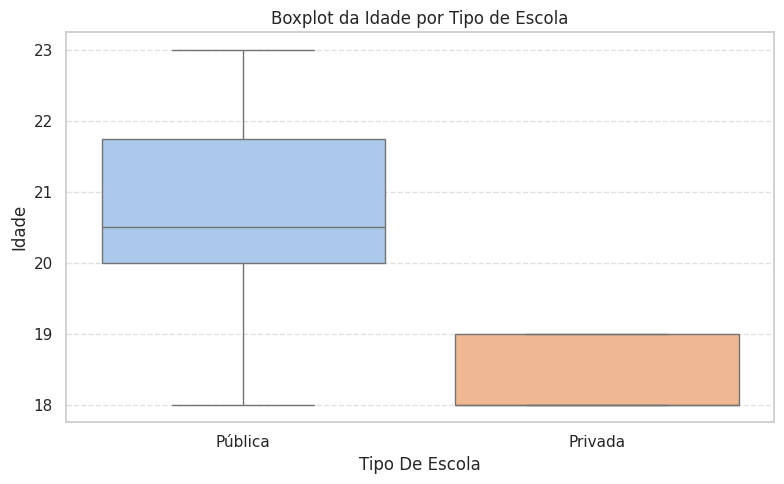

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Padroniza os nomes das colunas para evitar erros com espaços ou maiúsculas
df.columns = df.columns.str.strip().str.title()

# Função para calcular estatísticas da Idade
def estatisticas(df, grupo):
    idade = df['Idade']
    estat = {
        'n': len(idade),
        'Média': round(idade.mean(), 2),
        'Mediana': round(idade.median(), 2),
        'Moda': idade.mode().iat[0] if not idade.mode().empty else '---',
        'Mínimo': idade.min(),
        'Máximo': idade.max(),
        'Amplitude': idade.max() - idade.min(),
        '1º Quartil (Q1)': round(idade.quantile(0.25), 2),
        '3º Quartil (Q3)': round(idade.quantile(0.75), 2),
        'Intervalo Interquartil (IIQ)': round(idade.quantile(0.75) - idade.quantile(0.25), 2),
        'Desvio Padrão': round(idade.std(ddof=1), 2),
        'Coef. de Variação (CV)': f"{round(100 * idade.std(ddof=1) / idade.mean(), 1)}%"
    }
    return pd.Series(estat, name=grupo)

# Estatísticas por Tipo de Escola
grupo_publica = estatisticas(df[df['Tipo De Escola'] == 'Pública'], 'Pública')
grupo_privada = estatisticas(df[df['Tipo De Escola'] == 'Privada'], 'Privada')

# Tabela final com estatísticas
tabela_estatisticas = pd.concat([grupo_publica, grupo_privada], axis=1)
print(tabela_estatisticas)

# Boxplot da Idade por Tipo de Escola
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Tipo De Escola', y='Idade', palette='pastel')
plt.title('Boxplot da Idade por Tipo de Escola')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# **c) Nota de Ingresso e Trabalha**

                             Trabalha Não Trabalha
n                                   7            8
Média                          683.57       757.75
Mediana                         680.0        772.5
Moda                              662          690
Mínimo                            662          690
Máximo                            705          815
Amplitude                          43          125
1º Quartil (Q1)                 672.5        711.5
3º Quartil (Q3)                 696.5        791.5
Intervalo Interquartil (IIQ)     24.0         80.0
Desvio Padrão                   15.99         47.3
Coef. de Variação (CV)           2.3%         6.2%


/tmp/ipython-input-1528647083.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Trabalha', y='Nota De Ingresso', palette='pastel')


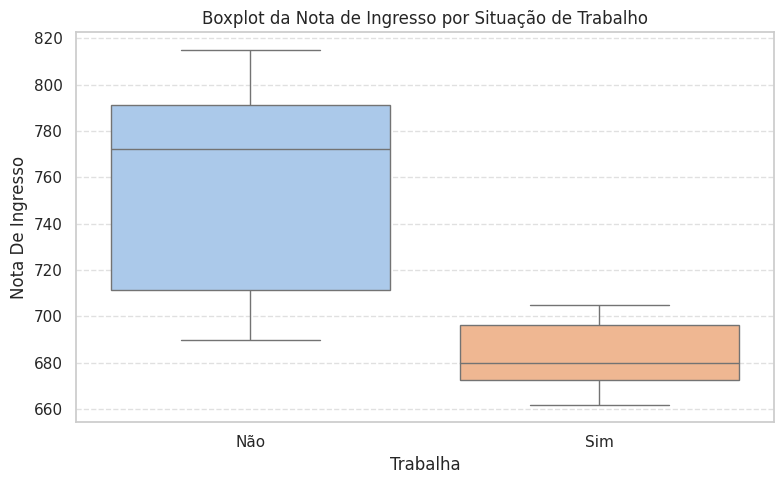

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Padroniza os nomes das colunas para evitar erros com espaços ou maiúsculas
df.columns = df.columns.str.strip().str.title()

# Função para calcular estatísticas da Nota de Ingresso
def estatisticas(df, grupo):
    nota = df['Nota De Ingresso']
    estat = {
        'n': len(nota),
        'Média': round(nota.mean(), 2),
        'Mediana': round(nota.median(), 2),
        'Moda': nota.mode().iat[0] if not nota.mode().empty else '---',
        'Mínimo': nota.min(),
        'Máximo': nota.max(),
        'Amplitude': nota.max() - nota.min(),
        '1º Quartil (Q1)': round(nota.quantile(0.25), 2),
        '3º Quartil (Q3)': round(nota.quantile(0.75), 2),
        'Intervalo Interquartil (IIQ)': round(nota.quantile(0.75) - nota.quantile(0.25), 2),
        'Desvio Padrão': round(nota.std(ddof=1), 2),
        'Coef. de Variação (CV)': f"{round(100 * nota.std(ddof=1) / nota.mean(), 1)}%"
    }
    return pd.Series(estat, name=grupo)

# Estatísticas por situação de trabalho
grupo_trabalha = estatisticas(df[df['Trabalha'] == 'Sim'], 'Trabalha')
grupo_nao_trabalha = estatisticas(df[df['Trabalha'] == 'Não'], 'Não Trabalha')

# Tabela final com estatísticas
tabela_estatisticas = pd.concat([grupo_trabalha, grupo_nao_trabalha], axis=1)
print(tabela_estatisticas)

# Boxplot da Nota de Ingresso por Situação de Trabalho
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Trabalha', y='Nota De Ingresso', palette='pastel')
plt.title('Boxplot da Nota de Ingresso por Situação de Trabalho')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **c) Idade e Trabalha**

                             Trabalha Não Trabalha
n                                   7            8
Média                           21.29        18.62
Mediana                          21.0         18.5
Moda                               20           18
Mínimo                             20           18
Máximo                             23           20
Amplitude                           3            2
1º Quartil (Q1)                  20.5         18.0
3º Quartil (Q3)                  22.0         19.0
Intervalo Interquartil (IIQ)      1.5          1.0
Desvio Padrão                    1.11         0.74
Coef. de Variação (CV)           5.2%         4.0%


/tmp/ipython-input-122190551.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Trabalha', y='Idade', palette='pastel')


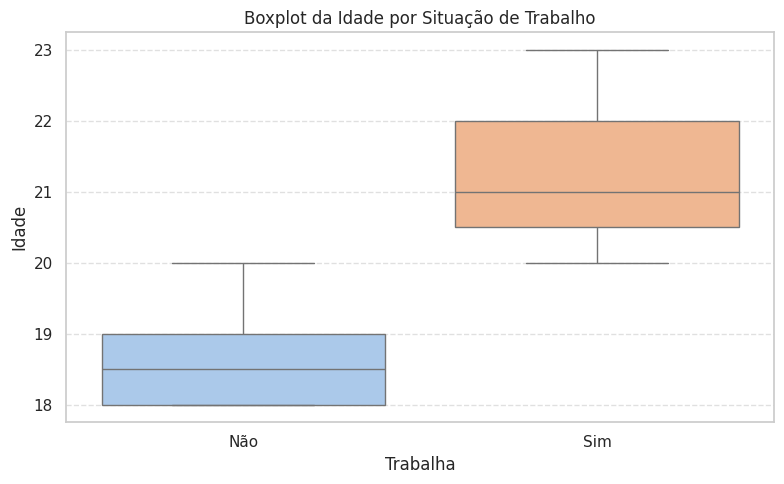

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Padroniza os nomes das colunas para evitar erros com espaços ou capitalização
df.columns = df.columns.str.strip().str.title()

# Função para calcular estatísticas da Idade
def estatisticas(df, grupo):
    idade = df['Idade']
    estat = {
        'n': len(idade),
        'Média': round(idade.mean(), 2),
        'Mediana': round(idade.median(), 2),
        'Moda': idade.mode().iat[0] if not idade.mode().empty else '---',
        'Mínimo': idade.min(),
        'Máximo': idade.max(),
        'Amplitude': idade.max() - idade.min(),
        '1º Quartil (Q1)': round(idade.quantile(0.25), 2),
        '3º Quartil (Q3)': round(idade.quantile(0.75), 2),
        'Intervalo Interquartil (IIQ)': round(idade.quantile(0.75) - idade.quantile(0.25), 2),
        'Desvio Padrão': round(idade.std(ddof=1), 2),
        'Coef. de Variação (CV)': f"{round(100 * idade.std(ddof=1) / idade.mean(), 1)}%"
    }
    return pd.Series(estat, name=grupo)

# Estatísticas por situação de trabalho
grupo_trabalha = estatisticas(df[df['Trabalha'] == 'Sim'], 'Trabalha')
grupo_nao_trabalha = estatisticas(df[df['Trabalha'] == 'Não'], 'Não Trabalha')

# Tabela final
tabela_estatisticas = pd.concat([grupo_trabalha, grupo_nao_trabalha], axis=1)
print(tabela_estatisticas)

# Boxplot da Idade por Situação de Trabalho
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Trabalha', y='Idade', palette='pastel')
plt.title('Boxplot da Idade por Situação de Trabalho')
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# **Exercício 2:** Considere a média de gols por jogo da Seleção Brasileira de Futebol em Copas do Mundo, conforme descrito na Tabela \ref{gols}.

\begin{table}[h!]
\centering
\begin{tabular}{c|c|c}
\textbf{Ano} & \textbf{País-sede} & \textbf{Média de Gols por Jogo} \\ \hline
1930 & Uruguai & 2,00 \\
1934 & Itália & 1,00 \\
1938 & França & 2,80 \\
1950 & Brasil & 3,14 \\
1954 & Suíça & 2,00 \\
1958 & Suécia & 2,67 \\
1962 & Chile & 2,33 \\
1966 & Inglaterra & 1,33 \\
1970 & México & 2,71 \\
1974 & Alemanha Ocidental & 0,86 \\
1978 & Argentina & 1,43 \\
1982 & Espanha & 2,14 \\
1986 & México & 2,00 \\
1990 & Itália & 1,00 \\
1994 & Estados Unidos & 1,57 \\
1998 & França & 2,00 \\
2002 & Coreia do Sul/Japão & 2,57 \\
2006 & Alemanha & 1,67 \\
2010 & África do Sul & 1,80 \\
2014 & Brasil & 2,14 \\
2018 & Rússia & 1,60 \\
2022 & Catar & 1,60 \\
\end{tabular}
\caption{Média de gols marcados por jogo da Seleção Brasileira em cada Copa do Mundo que participou.}
\label{gols}
\end{table}

Construa uma tabela de frequência com as classes apropriadas para a variável "Média de Gols por Jogo". Interprete os resultados obtidos, destacando o desempenho da seleção brasileira ao longo dos anos com base nas classes de frequência. \

Número de classes: 6
Amplitude total dos dados: 2.2800000000000002
Amplitude de cada classe: 0.38

Tabela de Frequência - Média de Gols por Jogo:

       Classe  Frequência Absoluta  Frequência Relativa  Frequência Absoluta Acumulada  Frequência Relativa Acumulada
[0.86 ; 1.24)                    3               0.1364                              3                         0.1364
[1.24 ; 1.62)                    5               0.2273                              8                         0.3637
 [1.62 ; 2.0)                    2               0.0909                             10                         0.4546
 [2.0 ; 2.38)                    7               0.3182                             17                         0.7728
[2.38 ; 2.76)                    3               0.1364                             20                         0.9092
[2.76 ; 3.15]                    2               0.0909                             22                         1.0001


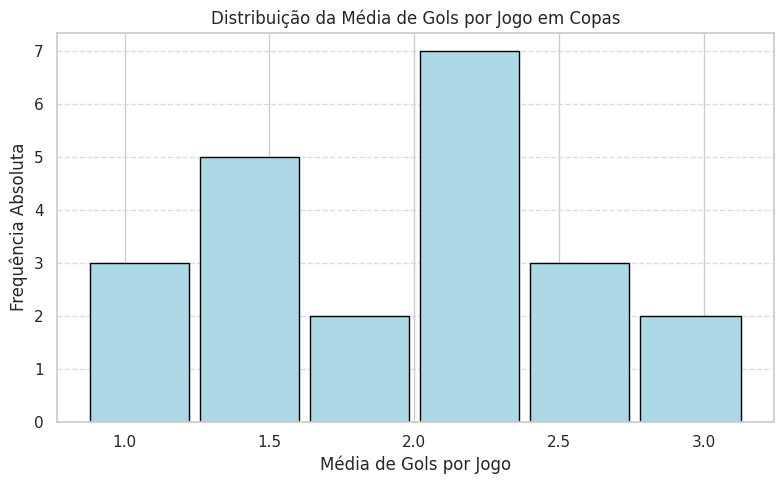

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Inserindo os dados
dados = {
    "Ano": [1930, 1934, 1938, 1950, 1954, 1958, 1962, 1966, 1970, 1974,
            1978, 1982, 1986, 1990, 1994, 1998, 2002, 2006, 2010, 2014, 2018, 2022],
    "País-sede": ["Uruguai", "Itália", "França", "Brasil", "Suíça", "Suécia", "Chile", "Inglaterra",
                  "México", "Alemanha Ocidental", "Argentina", "Espanha", "México", "Itália", "Estados Unidos",
                  "França", "Coreia do Sul/Japão", "Alemanha", "África do Sul", "Brasil", "Rússia", "Catar"],
    "Gols por jogo": [2.00, 1.00, 2.80, 3.14, 2.00, 2.67, 2.33, 1.33, 2.71, 0.86,
                      1.43, 2.14, 2.00, 1.00, 1.57, 2.00, 2.57, 1.67, 1.80, 2.14, 1.60, 1.60]
}

# 2. Criando o DataFrame
df = pd.DataFrame(dados)
gols = df["Gols por jogo"]

# 3. Número de classes usando a Regra de Sturges
n = len(gols)
k = int(np.ceil(1 + 3.322 * np.log10(n)))
print(f"Número de classes: {k}")

# 4. Amplitude total dos dados (máximo - mínimo)
amplitude_total = gols.max() - gols.min()
print(f"Amplitude total dos dados: {amplitude_total}")

# 5. Calculando a amplitude de cada classe (A / k)
amplitude_classe = round(amplitude_total / k, 2)
print(f"Amplitude de cada classe: {amplitude_classe}")

# 6. Definindo os limites das classes (último limite ajustado para incluir 3.14)
limite_inferior = gols.min()
limites_classes = [round(limite_inferior + i * amplitude_classe, 2) for i in range(k)]
limites_classes.append(gols.max() + 0.01)  # garante que o último ponto seja o valor máximo (3.14)

# 7. Criando os rótulos dos intervalos matemáticos
intervalos = []
for i in range(k):
    inicio = round(limites_classes[i], 2)
    fim = round(limites_classes[i + 1], 2)
    if i == k - 1:
        intervalos.append(f"[{inicio} ; {fim}]")  # última classe fechada nas duas pontas
    else:
        intervalos.append(f"[{inicio} ; {fim})")

# 8. Agrupando os dados em classes
classes = pd.cut(gols, bins=limites_classes, right=False, include_lowest=True)
frequencia = classes.value_counts().sort_index()

# 9. Construindo a tabela de frequência
tabela_freq = pd.DataFrame({
    "Classe": intervalos,
    "Frequência Absoluta": frequencia.values
})
tabela_freq["Frequência Relativa"] = (tabela_freq["Frequência Absoluta"] / n).round(4)
tabela_freq["Frequência Absoluta Acumulada"] = tabela_freq["Frequência Absoluta"].cumsum()
tabela_freq["Frequência Relativa Acumulada"] = tabela_freq["Frequência Relativa"].cumsum()

# 10. Exibindo a tabela de frequências
print("\nTabela de Frequência - Média de Gols por Jogo:\n")
print(tabela_freq.to_string(index=False))

# 11. Exibindo o histograma
plt.figure(figsize=(8, 5))
plt.hist(gols, bins=limites_classes, edgecolor='black', color='lightblue', rwidth=0.9, align='mid')
plt.title("Distribuição da Média de Gols por Jogo em Copas")
plt.xlabel("Média de Gols por Jogo")
plt.ylabel("Frequência Absoluta")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
len(limites_classes)

7